In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
business_improvement_districts = gpd.read_file('../data/Business Improvement District Boundaries (GIS).geojson')
business_improvement_districts = business_improvement_districts.drop(columns = ['area', 'modify_date','objectid','id','est_date','shape_stle','shape_star'])
business_improvement_districts = business_improvement_districts.rename(columns={'name': 'Name', 'ordinance':
                                                                               'Ordinance'})
business_improvement_districts

,Name,Ordinance,geometry
0,Central Business Improvement District,BL2017-580,"MULTIPOLYGON (((-86.78557 36.15742, -86.78417 ..."
1,Gulch Business Improvement District,BL2015-67,"MULTIPOLYGON (((-86.78457 36.15520, -86.78457 ..."


In [3]:
bike_racks = gpd.read_file('../data/Bike Racks (GIS).geojson')
bike_racks = bike_racks.drop(columns = ['lon', 'idnumber', 'type', 'objectid', 'lat', 'data_colle', 'location','domain'])
bike_racks = bike_racks.rename(columns = {'detail_loc' : 'Location', 'quantity' : 'Quantity', 'status' : 'Status', 'capacity' : 'Capacity' })
bike_racks

,Location,Quantity,Status,Capacity,geometry
0,Hickory Hollow Mall,1,Existing,12,POINT (-86.65545 36.04993)
1,Stones River Greenway - Donelson/Hermitage Area,2,Existing,4,POINT (-86.63406 36.18528)
2,"Percy Priest Reservoir, Stones River Greenway",0,Proposed,0,POINT (-86.62067 36.15842)
3,"Two Rivers Golf Course, Stones River Greenway ...",1,Existing,5,POINT (-86.68653 36.18755)
4,East Park & Community Center,3,Existing,15,POINT (-86.76218 36.17246)
...,...,...,...,...,...
425,NE Corner of Demonbruen St and Music Row,1,Existing,8,POINT (-86.79135 36.15239)
426,Morgan Park,1,Existing,4,POINT (-86.79099 36.18062)
427,2318 12th Ave S,1,Existing,10,POINT (-86.78916 36.12661)
428,East end of Shelby St Pedestrian Bridge,1,Existing,8,POINT (-86.76936 36.16431)


In [4]:
type(bike_racks)

geopandas.geodataframe.GeoDataFrame

In [5]:
type(business_improvement_districts)

geopandas.geodataframe.GeoDataFrame

In [6]:
bike_racks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Location  430 non-null    object  
 1   Quantity  430 non-null    object  
 2   Status    430 non-null    object  
 3   Capacity  430 non-null    object  
 4   geometry  430 non-null    geometry
dtypes: geometry(1), object(4)
memory usage: 16.9+ KB


In [7]:
business_improvement_districts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Name       2 non-null      object  
 1   Ordinance  2 non-null      object  
 2   geometry   2 non-null      geometry
dtypes: geometry(1), object(2)
memory usage: 176.0+ bytes


In [8]:
# join
bike_racks_by_district = gpd.sjoin(bike_racks, business_improvement_districts, op = 'within')
bike_racks_by_district

,Location,Quantity,Status,Capacity,geometry,index_right,Name,Ordinance
9,"Bus Stop; Church St at 5th Ave N, Fifth Third ...",0,Future Artistic,0,POINT (-86.77995 36.16337),0,Central Business Improvement District,BL2017-580
10,"Bus Stop; Church St at 5th Ave N, Fifth Third ...",1,Existing,2,POINT (-86.77974 36.16346),0,Central Business Improvement District,BL2017-580
11,Downtown Nashville Public Library,2,Existing,4,POINT (-86.78152 36.16235),0,Central Business Improvement District,BL2017-580
12,Bus Stop; Commerce St at 2nd Ave N - 2nd Ave...,0,Proposed,0,POINT (-86.77623 36.16328),0,Central Business Improvement District,BL2017-580
13,Bus Stop; Commerce St at 2nd Ave N - 2nd Ave...,0,Future Artistic,0,POINT (-86.77609 36.16314),0,Central Business Improvement District,BL2017-580
...,...,...,...,...,...,...,...,...
286,"Bus Stop; 12th Ave S at 11th Ave S, near Nearside",1,Existing,6,POINT (-86.78457 36.15201),1,Gulch Business Improvement District,BL2015-67
287,"Bus Stop; 12th Ave S at 11th Ave S, near Nearside",1,Existing,2,POINT (-86.78433 36.15202),1,Gulch Business Improvement District,BL2015-67
288,The Gulch; 11th Ave S at Pine St,2,Existing,4,POINT (-86.78382 36.15276),1,Gulch Business Improvement District,BL2015-67
373,Bus Stop; 12th Ave S at Division St,1,Existing,2,POINT (-86.78423 36.15080),1,Gulch Business Improvement District,BL2015-67


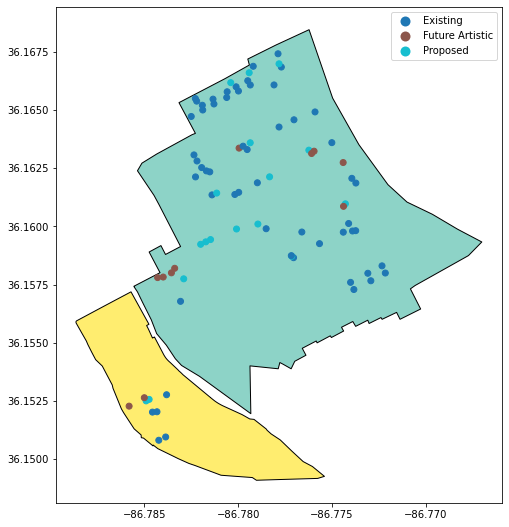

In [9]:
ax = business_improvement_districts.plot(figsize = (8, 10), cmap = 'Set3', edgecolor = 'black')
bike_racks_by_district.plot( ax = ax, column = 'Status', legend = True)
plt.show()

In [10]:
# business_improvement_districts.plot(column = 'Name', figsize=(10, 10),
#               edgecolor = 'black',
#               legend = True, 
#               cmap = 'Set3')
# bike_racks_by_district.plot()
# plt.show()

In [11]:
business_improvement_districts.geometry.centroid

<ipython-input-11-f538872833e8>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  business_improvement_districts.geometry.centroid


0    POINT (-86.77781 36.16002)
1    POINT (-86.78307 36.15239)
dtype: geometry

In [12]:
center = business_improvement_districts.geometry.centroid[0]
print(center)

POINT (-86.77781481021385 36.16002306452109)


<ipython-input-12-5f86523e94af>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = business_improvement_districts.geometry.centroid[0]


In [13]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.16002306452109, -86.77781481021385]


In [14]:
#create our map of Nashville Zip Code 37207 and show it
map_37207 = folium.Map(location =  area_center, zoom_start = 12)
map_37207

In [15]:
i = 0
for row_index, row_values in bike_racks_by_district.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 9
values are:
 
Location       Bus Stop; Church St at 5th Ave N, Fifth Third ...
Quantity                                                       0
Status                                           Future Artistic
Capacity                                                       0
geometry            POINT (-86.77995462667019 36.16337198970625)
index_right                                                    0
Name                       Central Business Improvement District
Ordinance                                             BL2017-580
Name: 9, dtype: object
------------------------- 
index is 10
values are:
 
Location       Bus Stop; Church St at 5th Ave N, Fifth Third ...
Quantity                                                       1
Status                                                  Existing
Capacity                                                       2
geometry            POINT (-86.77974046939214 36.16345545300331)
index_right                                           

In [19]:
map_bikes_and_businesses = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(business_improvement_districts).add_to(map_bikes_and_businesses)

#iterate through bike_racks_by_district to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in bike_racks_by_district.iterrows():
    loc = [row_values['geometry'].y, row_values['geometry'].x]
    pop = str(row_values['Location'])+ '<br><br>' + str(row_values['Status'])

    icon=folium.Icon(color="blue",icon="bicycle", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_bikes_and_businesses)
map_bikes_and_businesses.save('../maps/bikes_by_district.html')

#display our map
map_bikes_and_businesses